# SciKitLearn.Metrics

Этот модуль предоставляет готовые метрики использующие для оценки большинства задач классификации и регрессии. Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics
from matplotlib.colors import ListedColormap

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Генерация датасетов**

In [3]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2,
                                                   n_redundant=0, n_clusters_per_class=1,
                                                   random_state=7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                                   noise=5., random_state=7)

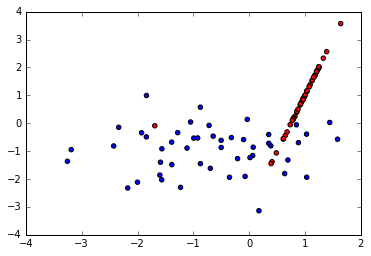

In [5]:
colors=ListedColormap(['red', 'blue'])
pylab.scatter(map(lambda x:x[0], clf_data), map(lambda x:x[1], clf_data), c=clf_target, cmap=colors)

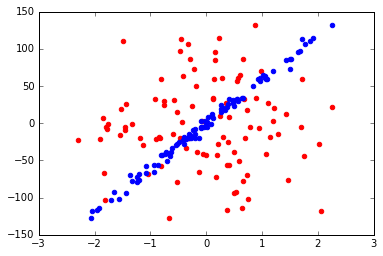

In [6]:
pylab.scatter(map(lambda x:x[0], reg_data), reg_target, color='r')
pylab.scatter(map(lambda x:x[1], reg_data), reg_target, color='b')

In [7]:
clf_train_data, clf_test_data, clf_train_label, clf_test_label = cross_validation.train_test_split(clf_data, clf_target,
                                                                                                   test_size=0.3,
                                                                                                   random_state=1)

In [8]:
reg_train_data, reg_test_data, reg_train_label, reg_test_label = cross_validation.train_test_split(reg_data, reg_target,
                                                                                                   test_size=0.3,
                                                                                                   random_state=1)

# Метрики качества в задачах классификации

In [9]:
# используем модель SGDClassifier - классификация на основании стохастического градиентного спуска
# в качестве функции потерь используем log_loss (так классификатор будет вероятностным)
classifier= linear_model.SGDClassifier(loss='log', random_state=1)

In [10]:
classifier.fit(clf_train_data, clf_train_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [12]:
predictions=classifier.predict(clf_test_data)
probability_prediction=classifier.predict_proba(clf_test_data)

print clf_test_label
print predictions
print probability_prediction

[1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1]
[1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1]
[[  6.30860475e-10   9.99999999e-01]
 [  1.30796176e-01   8.69203824e-01]
 [  9.99999957e-01   4.29396567e-08]
 [  9.99999998e-01   2.03589255e-09]
 [  6.79456491e-14   1.00000000e+00]
 [  9.92480510e-01   7.51949005e-03]
 [  6.27129282e-09   9.99999994e-01]
 [  9.99768437e-01   2.31563146e-04]
 [  4.23363514e-06   9.99995766e-01]
 [  9.99999996e-01   4.37306262e-09]
 [  9.99998580e-01   1.42012419e-06]
 [  2.50774068e-10   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  9.53516424e-01   4.64835761e-02]
 [  1.59664574e-04   9.99840335e-01]
 [  9.99999454e-01   5.45774089e-07]
 [  9.99970005e-01   2.99945879e-05]
 [  9.99999998e-01   1.51081346e-09]
 [  3.33030463e-01   6.66969537e-01]
 [  1.94570871e-07   9.99999805e-01]
 [  9.99999983e-01   1.65319259e-08]
 [  6.39962591e-01   3.60037409e-01]
 [  6.09980329e-03   9.93900197e-01]
 [  4.81872556e-04   9.99

**Расчет метрик:**

**accuracy**

In [18]:
#самостоятельная реализация "ACCURACY"
correct_answer=sum([1. if pair[0]==pair[1] else 0 for pair in zip(clf_test_label, predictions)])
correct_answer/len(clf_test_label)

0.83333333333333337

In [22]:
# стандартная реализация
metrics.accuracy_score(clf_test_label, predictions)

0.83333333333333337

**confusion_matrix**


это матрица размером колво_классов><колво_классов. где на диагонали у нас элементы на которые мы ответили верно а вне  диагонали где мы ошиблись. Полезна тем что на основе матрицы мы можем расчитывать различные метрики:

1.*precision*


In [23]:
matrix=metrics.confusion_matrix(clf_test_label, predictions)
print matrix

[[12  2]
 [ 3 13]]


In [24]:
sum([1. if pair[0]==pair[1] else 0 for pair in zip(clf_test_label, predictions)])

25.0

In [26]:
matrix.diagonal().sum()

25

**precision**

In [28]:
metrics.precision_score(clf_test_label, predictions, pos_label=0) ##  точность предсказания нуля

0.80000000000000004

In [29]:
metrics.precision_score(clf_test_label, predictions) ##  точность предсказания единицы(по умолчанию) ## 

0.8666666666666667

**recall**

In [31]:
metrics.recall_score(clf_test_label, predictions, pos_label=0) ##  полнота предсказания нуля

0.8571428571428571

In [32]:
metrics.recall_score(clf_test_label, predictions) ##  полнота предсказания единицы

0.8125

**f1**

In [33]:
metrics.f1_score(clf_test_label, predictions, pos_label=0) ##  f мера предсказания нуля

0.82758620689655182

In [34]:
metrics.f1_score(clf_test_label, predictions) ##  f мера предсказания единицы

0.83870967741935487

**classification report**


In [35]:
#комплексный отчет
print metrics.classification_report(clf_test_label, predictions)

             precision    recall  f1-score   support

          0       0.80      0.86      0.83        14
          1       0.87      0.81      0.84        16

avg / total       0.84      0.83      0.83        30



**ROC curve**

Для построения ROC curve мы 
- сначала сортируем объекты по предсказаной величине 
- затем делим их на несколько групп по некоторым пороговым отсечениям
- внутри каждой группы оцениваем TRUE Positive Rate и False Positive Rate
- далее когда есть списки TRUE POSITIVE и FALSE POSITIVE можно построить нашу ROC Curve

In [36]:
fpr, tpr, _=metrics.roc_curve(clf_test_label, probability_prediction[:, 1])

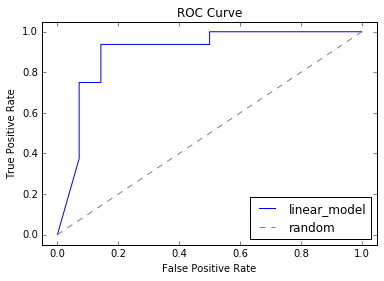

In [37]:
pylab.plot(fpr, tpr, label='linear_model')
pylab.plot([0, 1], [0, 1], '--', color='grey', label= 'random')
pylab.xlim([-.05, 1.05])
pylab.ylim([-.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC Curve')
pylab.legend(loc='lower right')

**ROC AUC**

площадь под ROC кривой

In [38]:
print metrics.roc_auc_score(clf_test_label, probability_prediction[:, 1])
print metrics.roc_auc_score(clf_test_label, predictions)

0.901785714286
0.834821428571


**PR AUC**

precision AUC

In [40]:
print metrics.average_precision_score(clf_test_label, predictions)

0.889583333333


**log_loss**

логистические потери. Чем меньше эта метрика тем лучше:

In [43]:
print metrics.log_loss(clf_test_label, probability_prediction[:, 1])

1.32840889106
